## Introduction to PyTorch

### Intro (tensors and operations)

In [1]:
import torch
torch.tensor([[2,3,5], [1,2,9]])

tensor([[2, 3, 5],
        [1, 2, 9]])

In [2]:
torch.rand(2,2)

tensor([[0.2368, 0.3930],
        [0.6660, 0.7606]])

In [5]:
a = torch.rand(2,3)
a.shape

torch.Size([2, 3])

In [7]:
b = torch.rand(3,2)
torch.matmul(a,b) # matrix mul 

tensor([[0.5821, 1.5516],
        [0.2843, 0.4641]])

> element-wise multiplication (*)

In [11]:
torch.rand(2,2) * torch.rand(2,2)

tensor([[0.3309, 0.3440],
        [0.0842, 0.5072]])

> Zeros, ones, identity

In [12]:
torch.zeros(2,2)

tensor([[0., 0.],
        [0., 0.]])

In [13]:
torch.ones(2,2)

tensor([[1., 1.],
        [1., 1.]])

In [15]:
torch.eye(3)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

> to and from numpy arrays:

In [16]:
import numpy as np
n = np.array([3,2,1])
n

array([3, 2, 1])

In [18]:
t = torch.from_numpy(n)
t

tensor([3, 2, 1])

In [21]:
t.detach().numpy()

array([3, 2, 1])

**Exercise**


In [22]:
# Create a matrix of ones with shape 3 by 3
tensor_of_ones = torch.ones(3, 3)

# Create an identity matrix with shape 3 by 3
identity_tensor = torch.eye(3)

# Do a matrix multiplication of tensor_of_ones with identity_tensor
matrices_multiplied = torch.matmul(tensor_of_ones, identity_tensor)
print(matrices_multiplied)

# Do an element-wise multiplication of tensor_of_ones with identity_tensor
element_multiplication = tensor_of_ones * identity_tensor
print(element_multiplication)

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])
tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])


### Forward Propogation

> Oversimplified example

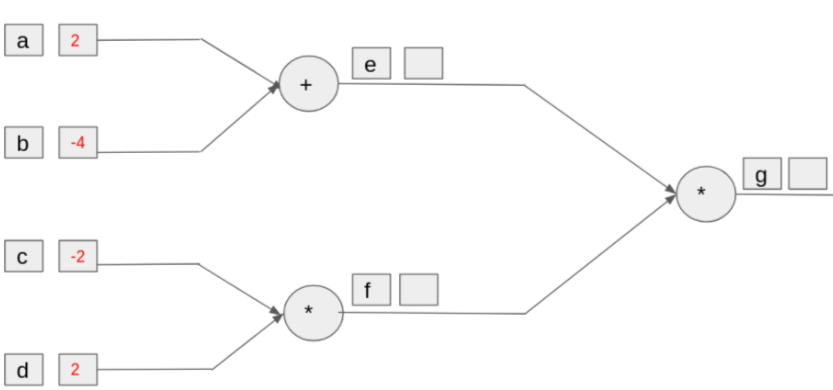

In [24]:
import torch

a = torch.tensor([2])
b = torch.tensor([-4])
c = torch.tensor([-2])
d = torch.tensor([2])
                 
e = a + b
f = c * d

g = e * f

print(e,f,g)

tensor([-2]) tensor([-4]) tensor([8])


In [25]:
# Initialize tensors x, y and z
x = torch.rand(1000, 1000)
y = torch.rand(1000, 1000)
z = torch.rand(1000, 1000)

# Multiply x with y
q = torch.matmul(x, y)

# Multiply elementwise z with q
f = z * q

mean_f = torch.mean(f)
print(mean_f)

tensor(125.0027)


### Backpropogation by Auto-differentiation

Derivative - rate of change of a function
* steepness of function 

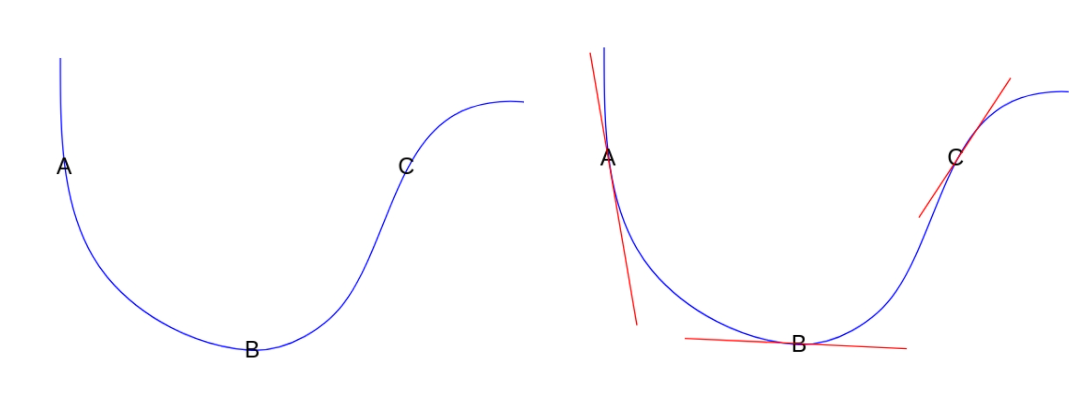

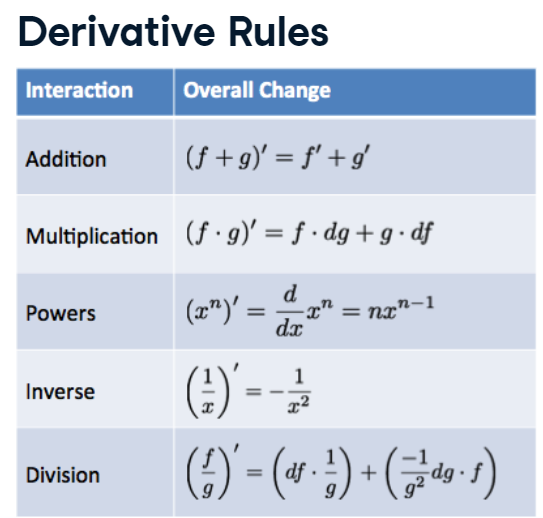

Chain rule: 

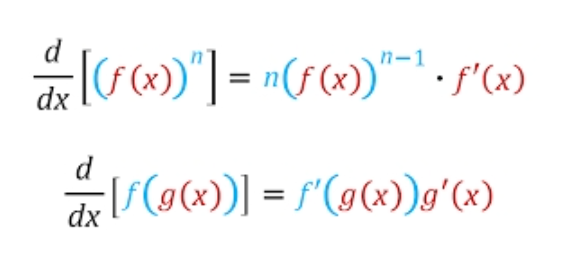

> Gradient

Gradient is a multi-variable generalization of the derivative

In [3]:
import torch

x = torch.tensor(-3., requires_grad = True)
y = torch.tensor(5., requires_grad = True)
z = torch.tensor(-2., requires_grad = True)

q = x + y
f = q * z

f.backward()

z.grad.item(), y.grad.item(), x.grad.item()

(2.0, -2.0, -2.0)

In [4]:
# Initialize x, y and z to values 4, -3 and 5
x = torch.tensor(4., requires_grad=True)
y = torch.tensor(-3., requires_grad=True)
z = torch.tensor(5., requires_grad=True)


# Set q to sum of x and y, set f to product of q with z
q = x + y
f = q * z

# Compute the derivatives
f.backward()

# Print the gradients
print("Gradient of x is: " + str(x.grad))
print("Gradient of y is: " + str(y.grad))
print("Gradient of z is: " + str(z.grad))

Gradient of x is: tensor(5.)
Gradient of y is: tensor(5.)
Gradient of z is: tensor(1.)


### Neural Networks

In [8]:
import torch

class Net(torch.nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    self.fc1 = torch.nn.Linear(10,20)
    self.fc2 = torch.nn.Linear(20,20)
    self.output = torch.nn.Linear(20,4)

  def forward(self,x):
    x = self.fc1(x)
    x = self.fc2(x)
    x = self.output(x)
    return x

In [9]:
input_layer = torch.rand(10)
net = Net()

result = net(input_layer)

In [11]:
input_layer, result

(tensor([0.8854, 0.8359, 0.3185, 0.6980, 0.9609, 0.1329, 0.6875, 0.3458, 0.3940,
         0.0131]),
 tensor([0.0957, 0.3620, 0.1402, 0.0295], grad_fn=<AddBackward0>))

In [19]:
# Initialize the weights of the neural network
input_layer = torch.tensor([0.6358, 0.9465, 0.3445, 0.4310, 0.5675, 0.0607, 0.0191, 0.1820, 0.5769,
        0.7965, 0.2798, 0.9267, 0.6405, 0.5053, 0.1130, 0.7679, 0.8237, 0.5697,
        0.2031, 0.2440, 0.5848, 0.7985, 0.7669, 0.2821, 0.9990, 0.3010, 0.0147])
weight_1 = torch.rand(27, 200)
weight_2 = torch.rand(200, 10)

# Multiply input_layer with weight_1
hidden_1 = torch.matmul(input_layer, weight_1)

# Multiply hidden_1 with weight_2
output_layer = torch.matmul(hidden_1,weight_2)
print(output_layer)

tensor([656.2518, 681.4699, 667.7023, 646.4077, 656.3474, 691.7040, 695.0316,
        723.9578, 695.2421, 652.0940])


## Artificial Neural Networks

### Activation Functions

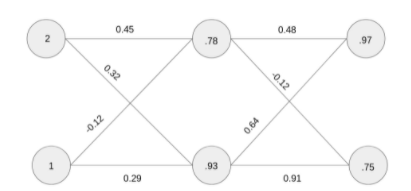

In [24]:
import torch
input_layer = torch.tensor([2., 1.])
weight_1 = torch.tensor([[.45,.32], [-.12,.29]])
hidden_layer = torch.matmul(input_layer, weight_1)
weight_2 = torch.tensor([[.48,-.12], [.64,.91]])
output_layer = torch.matmul(hidden_layer, weight_2)
print(output_layer)

tensor([0.9696, 0.7527])


matrix multiplication is a linear transformation

In [26]:
weight = torch.matmul(weight_1, weight_2)
output_layer = torch.matmul(input_layer, weight)
output_layer # same result

tensor([0.9696, 0.7527])

> Activation Functions

* Non-linear functions inserted in each layer of the neural network
  * can make nn non-linear and predict non-linear data

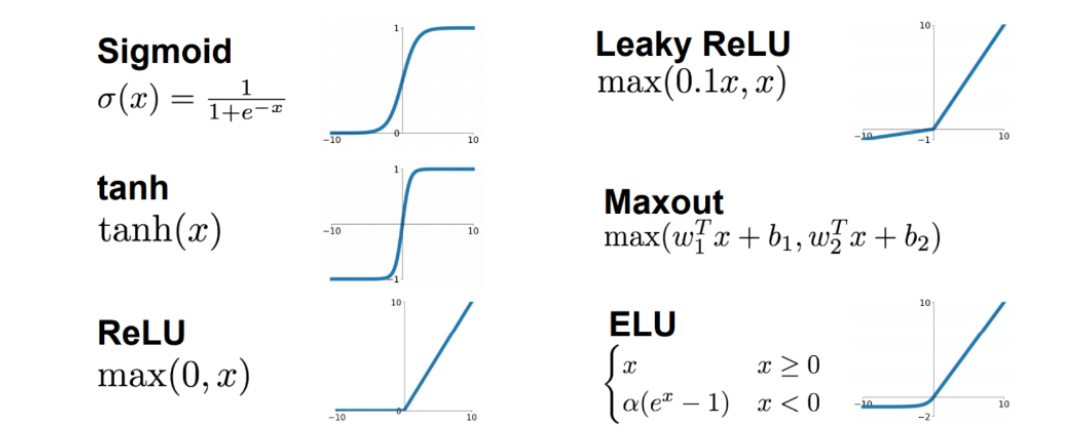

> ReLU

In [28]:
import torch.nn as nn
relu = nn.ReLU()

tensor_1 = torch.tensor([2,-4])
print(relu(tensor_1))

tensor([2, 0])


In [30]:
tensor_2 = torch.tensor([[2,-4], [1.2, 0]])
relu(tensor_2)

tensor([[2.0000, 0.0000],
        [1.2000, 0.0000]])

In [32]:
input_layer = torch.tensor([[ 0.0401, -0.9005,  0.0397, -0.0876]])
weight_1= torch.tensor([[-0.1094, -0.8285,  0.0416, -1.1222],
        [ 0.3327, -0.0461,  1.4473, -0.8070],
        [ 0.0681, -0.7058, -1.8017,  0.5857],
        [ 0.8764,  0.9618, -0.4505,  0.2888]])
weight_2= torch.tensor([[ 0.6856, -1.7650,  1.6375, -1.5759],
        [-0.1092, -0.1620,  0.1951, -0.1169],
        [-0.5120,  1.1997,  0.8483, -0.2476],
        [-0.3369,  0.5617, -0.6658,  0.2221]])
weight_3 = torch.tensor([[ 0.8824,  0.1268,  1.1951,  1.3061],
        [-0.8753, -0.3277, -0.1454, -0.0167],
        [ 0.3582,  0.3254, -1.8509, -1.4205],
        [ 0.3786,  0.5999, -0.5665, -0.3975]])

In [33]:
# Calculate the first and second hidden layer
hidden_1 = torch.matmul(input_layer, weight_1)
hidden_2 = torch.matmul(hidden_1, weight_2)

# Calculate the output
print(torch.matmul(hidden_2, weight_3))

# Calculate weight_composed_1 and weight
weight_composed_1 = torch.matmul(weight_1, weight_2)
weight = torch.matmul(weight_composed_1, weight_3)

# Multiply input_layer with weight
print(torch.matmul(input_layer, weight))

tensor([[0.2653, 0.1311, 3.8219, 3.0032]])
tensor([[0.2653, 0.1311, 3.8219, 3.0032]])


In this exercise, we have the same settings as the previous exercise. In addition, we have instantiated the ReLU activation function called relu().

Now we are going to build a neural network which has non-linearity and by doing so, we are going to convince ourselves that networks with multiple layers and non-linearity functions cannot be expressed as a neural network with one layer.

In [34]:
# Apply non-linearity on hidden_1 and hidden_2
hidden_1_activated = relu(torch.matmul(input_layer, weight_1))
hidden_2_activated = relu(torch.matmul(hidden_1_activated, weight_2))
print(torch.matmul(hidden_2_activated, weight_3))

# Apply non-linearity in the product of first two weights. 
weight_composed_1_activated = relu(torch.matmul(weight_1, weight_2))

# Multiply `weight_composed_1_activated` with `weight_3
weight = torch.matmul(weight_composed_1_activated, weight_3)

# Multiply input_layer with weight
print(torch.matmul(input_layer, weight))

tensor([[-0.2770, -0.0345, -0.1410, -0.0664]])
tensor([[-0.2117, -0.4782,  4.0438,  3.0417]])


Neural networks don't need to have the same number of units in each layer. Here, you are going to experiment with the ReLU activation function again, but this time we are going to have a different number of units in the layers of the neural network. The input layer will still have 4 features, but then the first hidden layer will have 6 units and the output layer will have 2 units.

In [39]:
# Instantiate ReLU activation function as relu
relu = torch.nn.ReLU()

# Initialize weight_1 and weight_2 with random numbers
weight_1 = torch.rand(4,6)
weight_2 = torch.rand(6,2)

# Multiply input_layer with weight_1
hidden_1 = torch.matmul(input_layer, weight_1)

# Apply ReLU activation function over hidden_1 and multiply with weight_2
hidden_1_activated = relu(hidden_1)
print(torch.matmul(hidden_1_activated, weight_2))

tensor([[0., 0.]])


### Loss Functions

So far in course, all NNs had random weights and so were not very useful

* Loss Functions Steps
  * Initialize NNs with random weights
  * Do a forward pass
  * Calculate loss function
  * Calculate the gradients (w/ backprop)
  * Change the weights based on gradients

For regression
* Least squared loss

For classification
* Softmax cross-entropy

More complicated problems
* More complicated loss functions

Loss function should be differentiable

Softmax - function that transforms numbers into probabilities


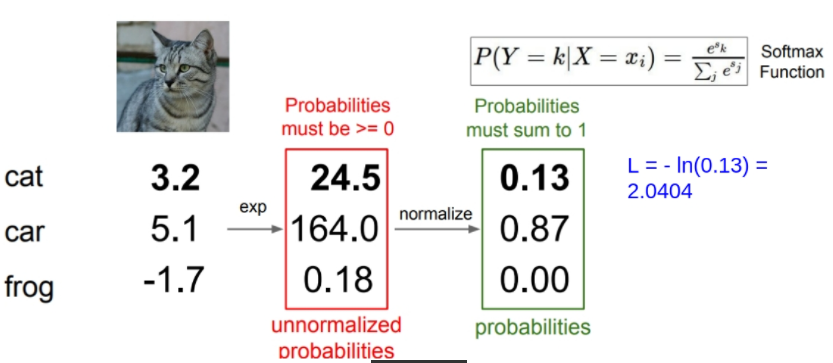

In [40]:
logits = torch.tensor([[3.2,5.1,-1.7]])
ground_truth = torch.tensor([0])
criterion = nn.CrossEntropyLoss()

loss = criterion(logits, ground_truth)
loss

tensor(2.0404)

In [41]:
# Initialize the scores and ground truth
logits = torch.tensor([[-1.2, 0.12, 4.8]])
ground_truth = torch.tensor([2])

# Instantiate cross entropy loss
criterion = nn.CrossEntropyLoss()

# Compute and print the loss
loss = criterion(logits, ground_truth)
print(loss)

tensor(0.0117)


### Preparing a Dataset in PyTorch

> Datasets and Dataloaders

In [7]:
import torch
import torchvision
import torch.utils.data
import torchvision.transforms as transforms

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((.4914,.48216,.44653),(.24703,.2439,.26159))])

In [14]:
trainset = torchvision.datasets.CIFAR10(root = './data', train = True, download=True, transform= transform)
testset = torchvision.datasets.CIFAR10(root = './data', train = False, download=True, transform= transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size= 32, shuffle=True, num_workers=4)
testloader = torch.utils.data.DataLoader(testset, batch_size= 32, shuffle=True, num_workers=4)

Files already downloaded and verified
Files already downloaded and verified


/usr/local/lib/python3.7/dist-packages/torch/utils/data/dataloader.py:477: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  cpuset_checked))


DataLoader object
* batch size - 32 randomly selected images

In [9]:
testloader.dataset.data.shape, trainloader.dataset.data.shape

((10000, 32, 32, 3), (50000, 32, 32, 3))

In [10]:
testloader.batch_size

32

In [11]:
trainloader.sampler

In [12]:
# Transform the data to torch tensors and normalize it 
transform = transforms.Compose([transforms.ToTensor(),
								transforms.Normalize((.1307), ((.3081)))])

# Prepare training set and testing set
trainset = torchvision.datasets.MNIST('mnist', train=True, 
									  download=True, transform=transform)
testset = torchvision.datasets.MNIST('mnist', train=False, 
									  download=True, transform=transform)

# Prepare training loader and testing loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size= 32, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(testset, batch_size= 32, shuffle=False, num_workers=0) 


Extracting mnist/MNIST/raw/train-images-idx3-ubyte.gz to mnist/MNIST/raw




Extracting mnist/MNIST/raw/train-labels-idx1-ubyte.gz to mnist/MNIST/raw




Extracting mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to mnist/MNIST/raw




Extracting mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to mnist/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [7]:
# Compute the shape of the training set and testing set
trainset_shape = trainloader.dataset.train_data.shape
testset_shape = testloader.dataset.test_data.shape

# Print the computed shapes
print(trainset_shape, testset_shape)

# Compute the size of the minibatch for training set and testing set
trainset_batchsize = trainloader.batch_size
testset_batchsize = testloader.batch_size

# Print sizes of the minibatch
print(trainset_batchsize, testset_batchsize)

torch.Size([60000, 28, 28]) torch.Size([10000, 28, 28])
32 32


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:64: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:69: UserWarning: test_data has been renamed data
  warnings.warn("test_data has been renamed data")


### Training Neural Networks

Building NN:
* Prepare the dataloaders
* Build a neural network
* Loop over:
  * Forward pass
  * Calc loss function
  * Calculate the gradients (backprop)
  * Change weights based on gradients 

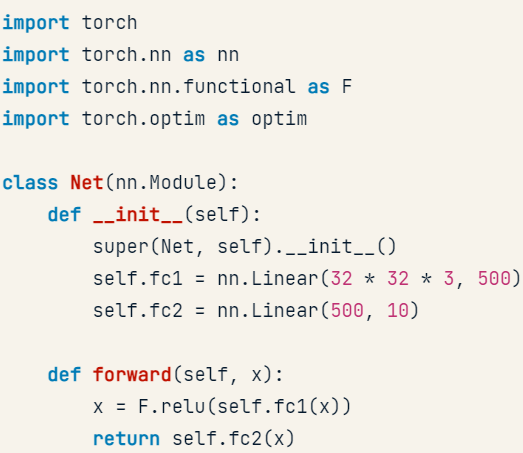 ![img.png]( 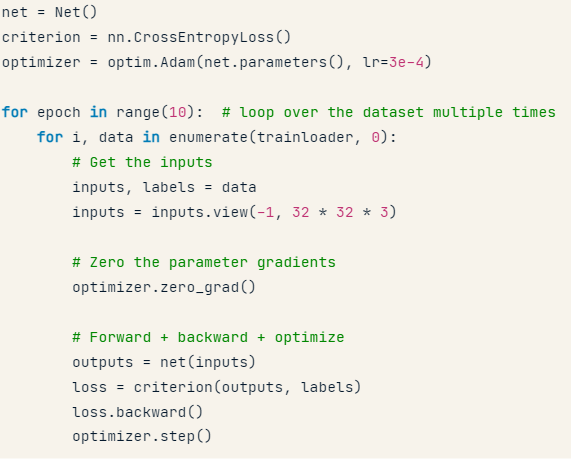)

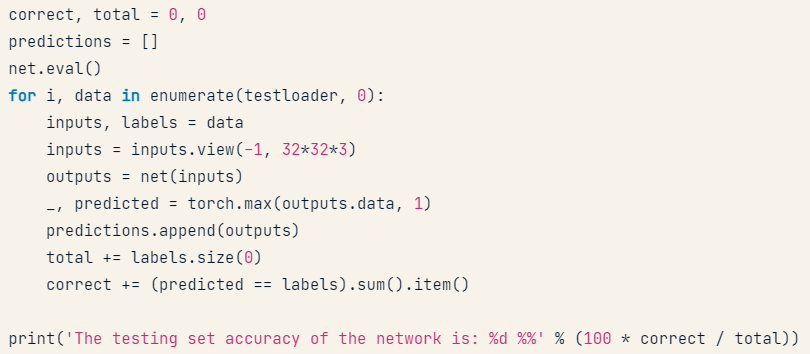

In [22]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
# Define the class Net

class Net(nn.Module):
    def __init__(self):    
    	# Define all the parameters of the net
        super(Net, self).__init__()
        self.fc1 = nn.Linear(28 * 28 * 1, 200)
        self.fc2 = nn.Linear(200,10)

    def forward(self, x):   
    	# Do the forward pass
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

In [27]:
# Instantiate the Adam optimizer and Cross-Entropy loss function
model = Net()   
optimizer = optim.Adam(model.parameters(), lr=3e-4)
criterion = nn.CrossEntropyLoss()
  
for batch_idx, data_target in enumerate(trainloader):
    data = data_target[0]
    target = data_target[1]
    data = data.view(-1, 28 * 28)
    optimizer.zero_grad()

    # Complete a forward pass
    output = model(data)

    # Compute the loss, gradients and change the weights
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()

In [28]:
# Set the model in eval mode
model.eval()

total = 0
correct = 0

for i, data in enumerate(testloader, 0):
    
    inputs, labels = data
    
    # Put each image into a vector
    inputs = inputs.view(-1, 28*28)
    
    # Do the forward pass and get the predictions
    outputs = model(inputs)
    _, outputs = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (outputs == labels).sum().item()
print('The testing set accuracy of the network is: %d %%' % (100 * correct / total))

The testing set accuracy of the network is: 95 %


## Convolutional Neural Network

### Convolution Operator

Problem with fully connected nns
* Do you need to consider all the relations between the features?
* Big and very computationally inefficient
* Can overfit

Mitigating
* Units are connected with only a few units from the previous layer
* Units share weights

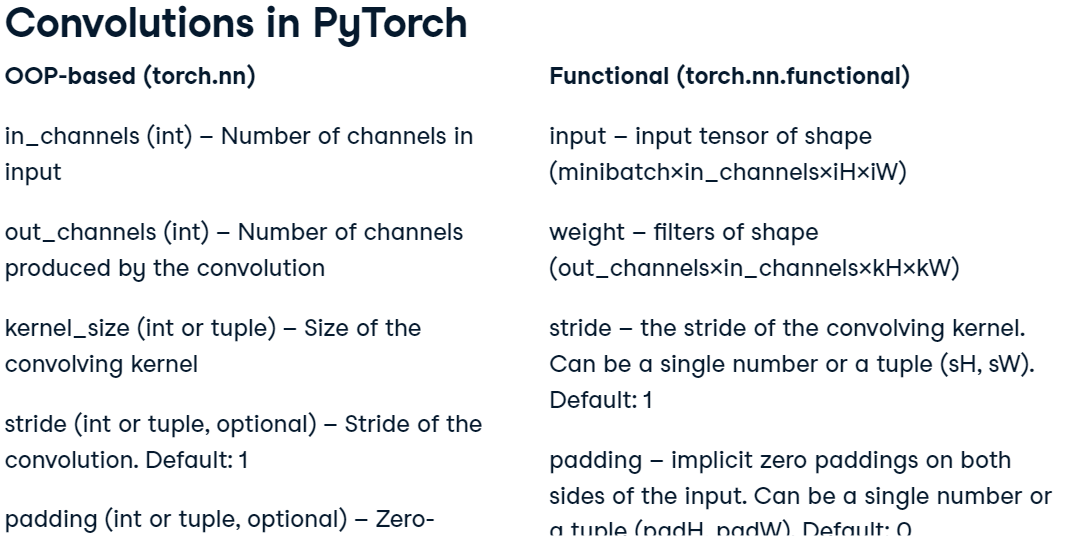

In [29]:
import torch
import torch.nn

image = torch.rand(16,3,32,32)
conv_filter = torch.nn.Conv2d(in_channels=3, out_channels=1, kernel_size=5, stride=1, padding = 0)
output_feature = conv_filter(image)

print(output_feature.shape)

torch.Size([16, 1, 28, 28])


In [31]:
import torch.nn.functional as F

image = torch.rand(16,3,32,32)
filter = torch.rand(1,3,5,5)
out_feat_F = F.conv2d(image, filter, stride=1, padding=0)

print(out_feat_F.shape)

torch.Size([16, 1, 28, 28])


### Pooling Operators

Convolutions are used to extract features from the image, while pooling is a way of feature selection

* Also lower resolution, making more efficient

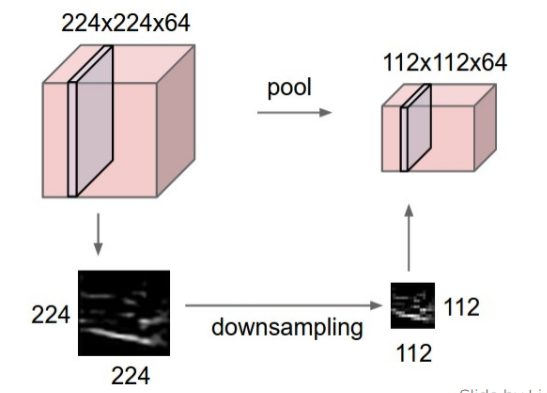

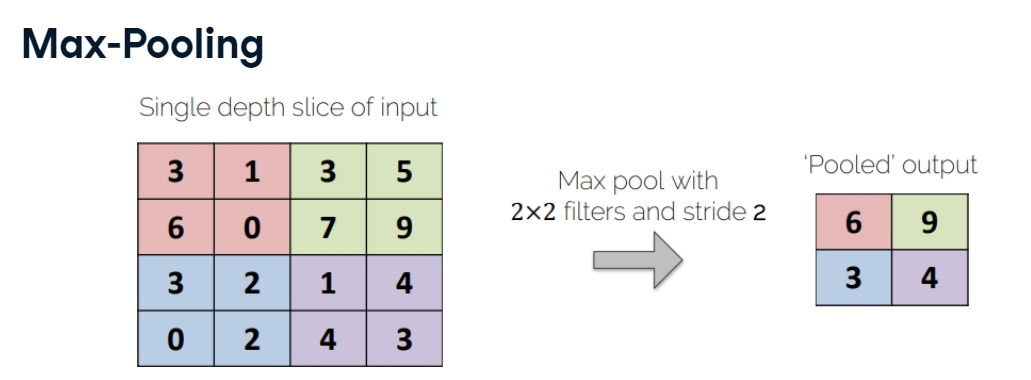

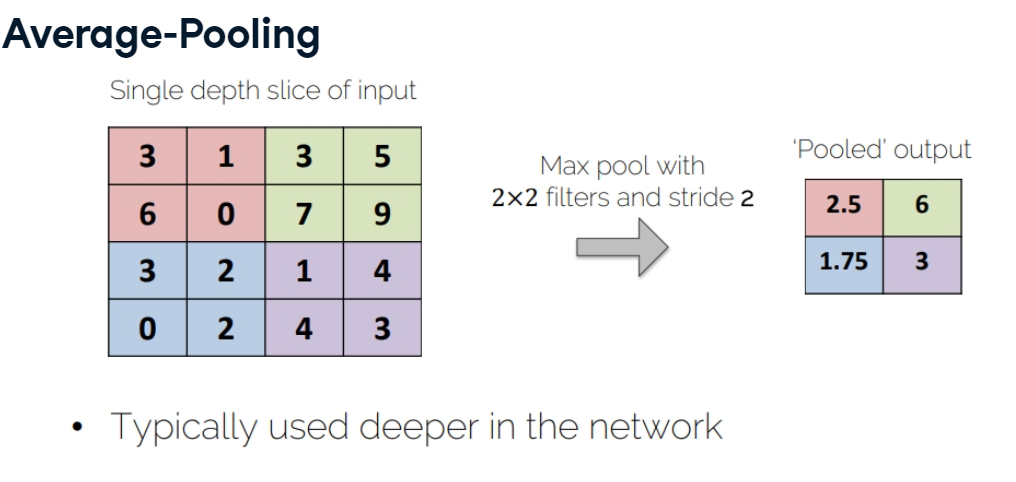

> OOP:

In [3]:
import torch
import torch.nn

im = torch.Tensor([[[[3,1,3,4],[6,0,7,9], [3,2,1,4], [0,2,4,3]]]]) # initialize image 
max_pooling = torch.nn.MaxPool2d(2)
output_feature =  max_pooling(im)
print(output_feature)

tensor([[[[6., 9.],
          [3., 4.]]]])


> Functional

In [4]:
import torch
import torch.nn.functional as F

im = torch.Tensor([[[[3,1,3,4],[6,0,7,9], [3,2,1,4], [0,2,4,3]]]])

output_feature_F =  F.max_pool2d(im,2)
print(output_feature)

tensor([[[[6., 9.],
          [3., 4.]]]])


### Convolutional Neural Networks

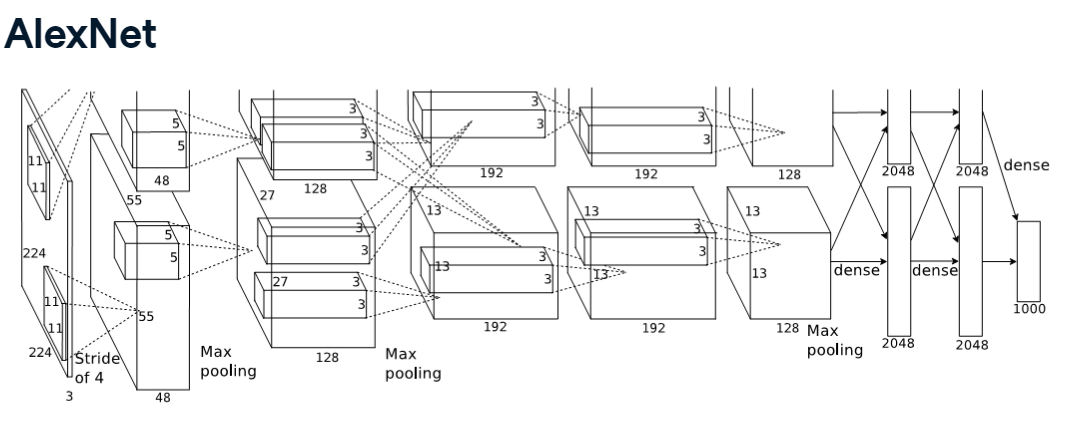

CNN - Neural network with multiple convolutional and pooling layers

In [13]:
import torch.nn as nn

class AlexNet(nn. Module):
  def __init__(self, num_classes=1000):
    super(AlexNet, self).__init__()
    self.conv1 = nn.Conv2d(3, 64, kernel_size=11, stride=4, padding=2)
    self.relu = nn. ReLU(inplace=True)
    self.maxpool = nn. MaxPool2d(kernel_size=3, stride=2)
    self.conv2 = nn. Conv2d(64, 192, kernel_size=5, padding=2)
    self.conv3 = nn.Conv2d(192, 384, kernel_size=3, padding=1)
    self.conv4 = nn.Conv2d(384, 256, kernel_size=3, padding=1)
    self.conv5 = nn.Conv2d(256, 256, kernel_size=3, padding=1)
    self.avgpool = nn. AdaptiveAvgPool2d((6, 6))
    self.fc1 = nn.Linear (256 * 6 * 6, 4096)
    self.fc2 = nn.Linear (4096, 4096)
    self.fc3 = nn.Linear(4096, num_classes)

  def forward(self, x):
    x = self.relu(self.conv1(x))
    x = self.maxpool(x)
    x = self.relu(self.conv2(x))
    x = self.maxpool(x)
    x = self.relu(self.conv3(x))
    x = self.relu(self.conv4(x))
    x = self.relu(self.conv5(x))
    x = self.maxpool(x)
    x = self.avgpool(x)
    x = x.view(x.size(0), 256 * 6 * 6)
    x = self.relu(self.fc1(x))
    x = self.relu(self.fc2(x))
    return self.fc3(x)

### Training a Convolutional Neural Net

In [16]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as functional
import torch.optim as optim

transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,shuffle=True, num_workers=2)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128, shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [23]:
class Net(nn. Module):
  def __init__(self, num_classes = 10):
    super(Net, self).__init__()
    self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
    self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
    self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
    self.pool = nn.MaxPool2d(2, 2)
    self.fc = nn.Linear(128 * 4 * 4, num_classes)
  def forward(self, x):
    x = self.pool(F.relu(self.conv1(x)))
    x = self.pool(F.relu(self.conv2(x)))
    x = self.pool(F.relu(self.conv3(x)))
    x = x.view(-1, 128 * 4 * 4)
    return self.fc(x)

net = Net()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr = 3e-4)

> Training

In [28]:
for epoch in range(10):
  for i, data in enumerate(trainloader, 0):
    # Get the inputs
    inputs, labels = data
    # Zero the parameter gradients
    optimizer.zero_grad()
    # Forward + backward + optimize
    outputs = net(inputs)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()

print('Finished Training')


Finished Training


> Evaluating:

In [30]:
correct, total = 0,0
predictions = []
net.eval()

for i, data in enumerate(testloader, 0):
  inputs, labels = data
  outputs = net(inputs)
  _, predicted = torch.max(outputs.data, 1)
  predictions.append(outputs)
  total += labels.size(0)
  correct += (predicted == labels).sum().item()

print(f'Test set accuracy is: {100 * correct / total}')


Test set accuracy is: 71.76


## Using Convolutional Neural Nets

### Sequential()

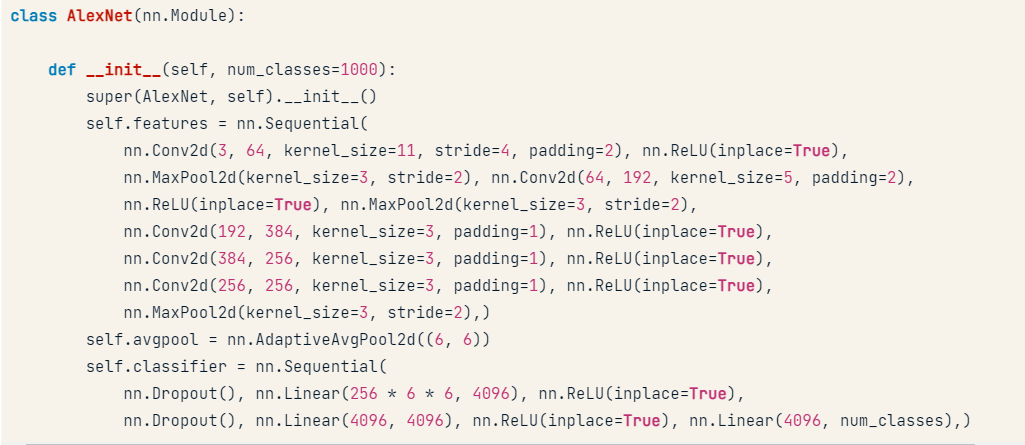

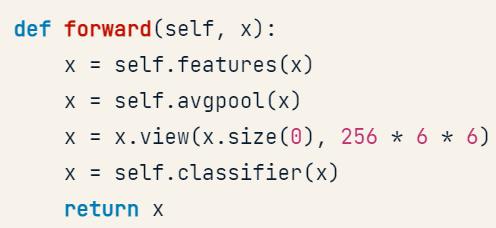

### Overfitting Problem

Detecting overfitting:

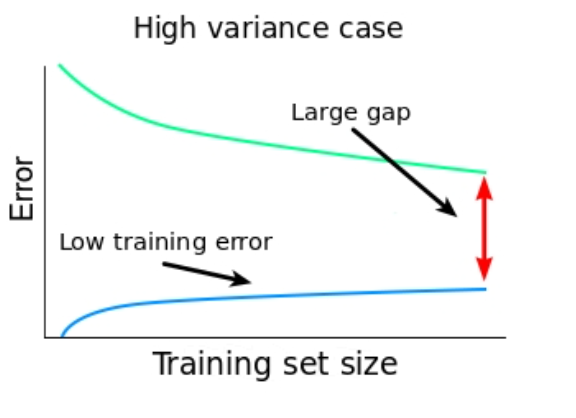

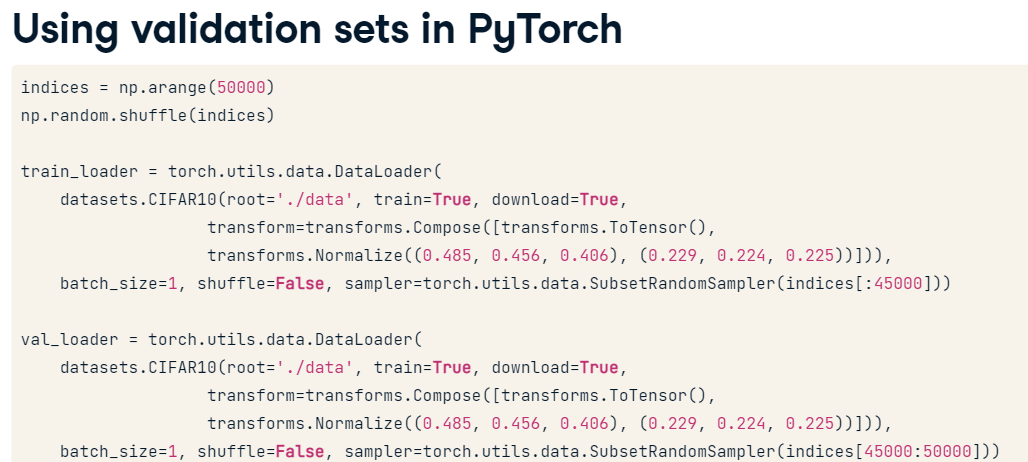

### Regularization Techniques

L2 regularization

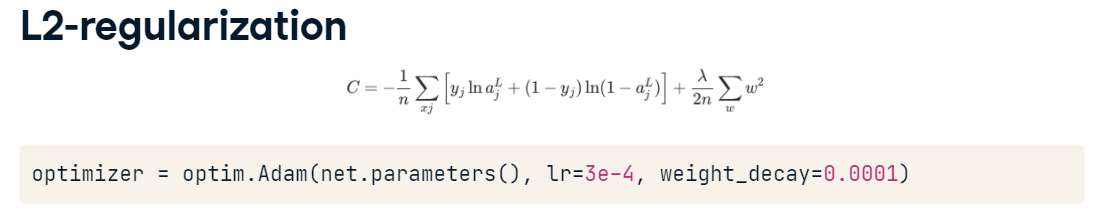

Dropout

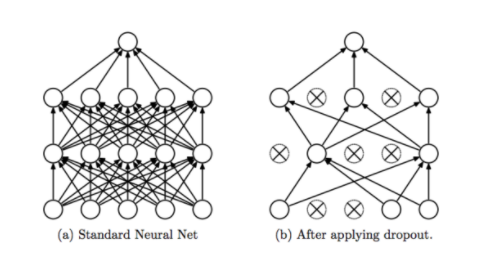

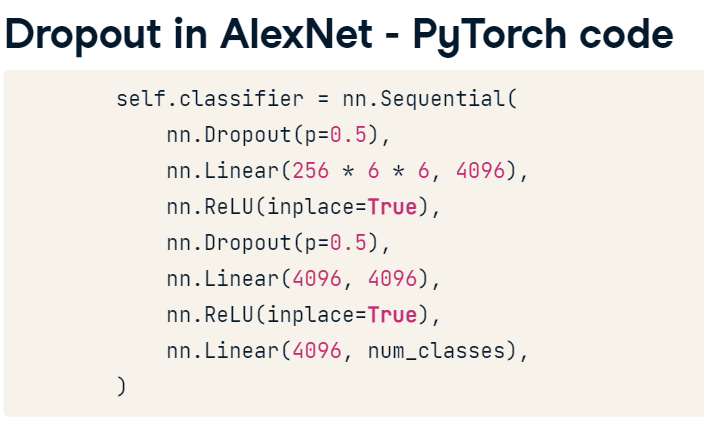

Batch Normalization

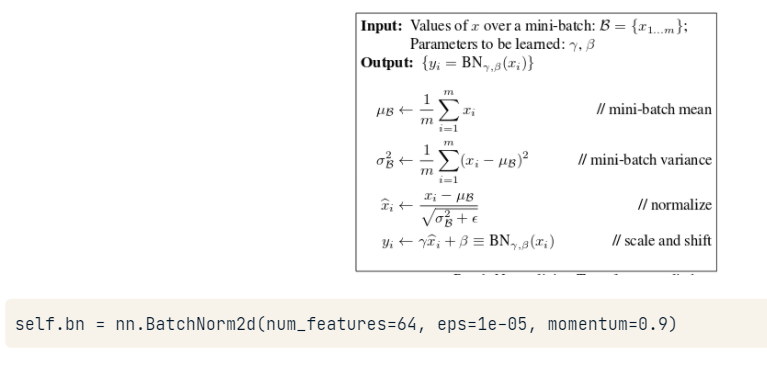

```
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        
        # Implement the sequential module for feature extraction
        self.features = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=10, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2), nn.ReLU(inplace=True), nn.BatchNorm2d(10),
            nn.Conv2d(in_channels=10, out_channels=20, kernel_size=3, stride=1, padding=1),
            nn.MaxPool2d(2, 2), nn.ReLU(inplace=True), nn.BatchNorm2d(20))
        
        # Implement the fully connected layer for classification
        self.fc = nn.Linear(in_features=7*7*20, out_features=10)
```

Early stopping

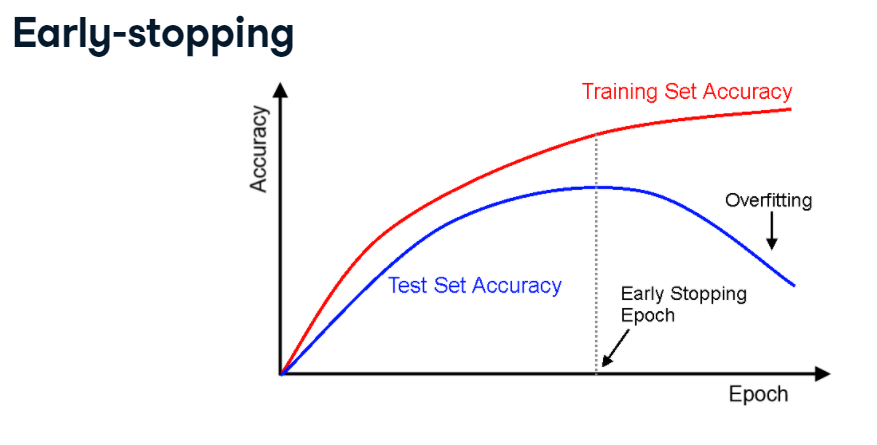

Important to set model into train/eval mode 

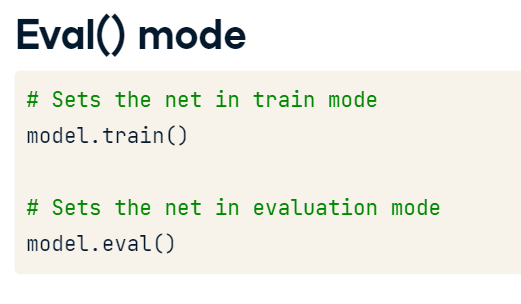

### Transfer Learning

Deeper you go in network, more abstract the features become

Early layers are more generalizable - can be used in other similar applications

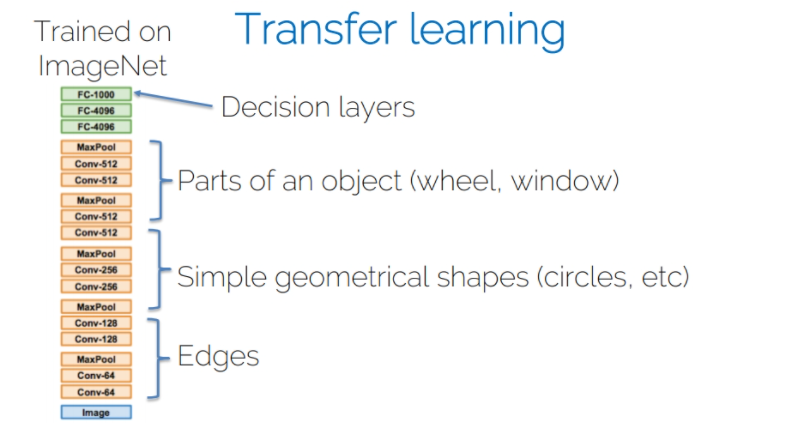

Can use to train  neural networks on very small datasets

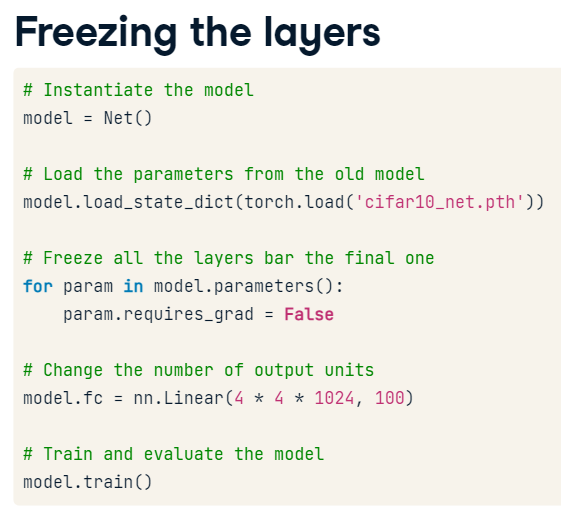

Torchvision library has many pre-trained datasets

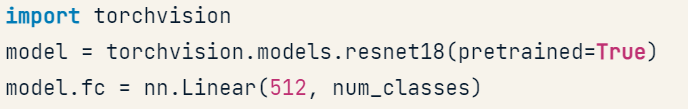

Just need to change number of classes in dataset, and have a good net ready to be used